In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Onsite excell
---

In [2]:
import pandas as pd

Onesite = pd.read_excel('/content/drive/MyDrive/Nasa/SCADA/Onsite-MetMast-SCADA-data-2017.xlsx')
Onesite.head()

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2017-12-02T11:40:00+00:00,0.6,1.7,1.1,0.05,0.6,1.6,1.1,0.04,268.0,...,0,0.0499,0.24,1,0,0,600,19,18,415
1,2017-12-02T13:10:00+00:00,4.6,7.4,6.1,0.25,4.4,7.6,6.0,0.27,358.0,...,0,0.0499,0.24,1,0,0,600,118,116,415
2,2017-12-02T13:30:00+00:00,3.7,6.5,5.1,0.27,3.5,6.5,5.0,0.27,341.0,...,0,0.0499,0.24,1,0,0,600,98,97,414
3,2017-12-02T14:40:00+00:00,4.5,7.2,6.0,0.19,4.7,6.9,5.9,0.18,341.0,...,0,0.0499,0.24,1,0,0,600,116,115,414
4,2017-12-02T14:50:00+00:00,5.2,7.9,6.4,0.28,5.1,8.0,6.3,0.27,358.0,...,0,0.0499,0.24,1,0,0,600,125,123,414


In [7]:
print(f"Dataset len: {len(Onesite)}\nstart time:{Onesite['Timestamp'].min()}\nend time:{Onesite['Timestamp'].max()}\n")

Dataset len: 34831
start time:2017-01-01T00:00:00+00:00
end time:2017-12-31T23:50:00+00:00



In [8]:
Onesite_sorted = Onesite.sort_values(by='Timestamp')
Onesite_sorted['Timestamp'][:10]

,Timestamp
24354,2017-01-01T00:00:00+00:00
20618,2017-01-01T00:10:00+00:00
34569,2017-01-01T00:20:00+00:00
5408,2017-01-01T00:30:00+00:00
27202,2017-01-01T00:40:00+00:00
21790,2017-01-01T00:50:00+00:00
11152,2017-01-01T01:00:00+00:00
12882,2017-01-01T01:10:00+00:00
5410,2017-01-01T01:20:00+00:00
14351,2017-01-01T01:30:00+00:00


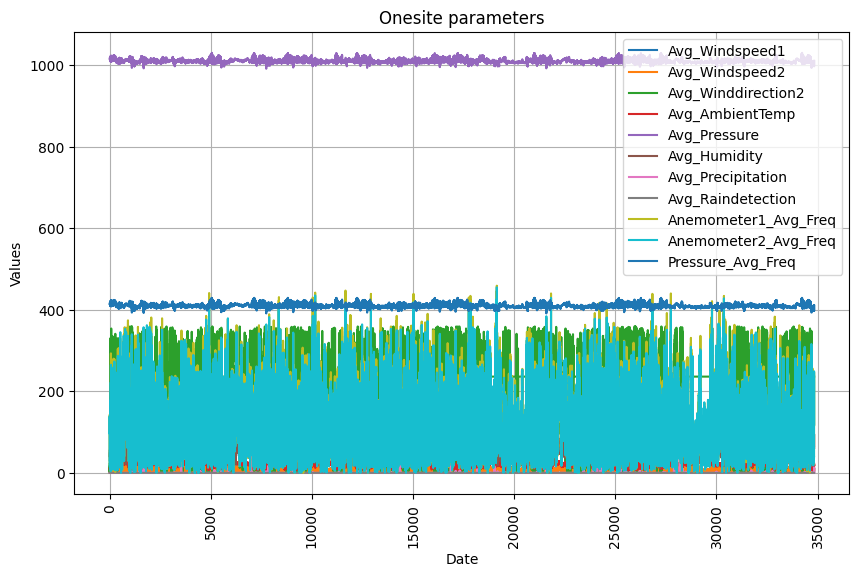

In [ ]:
import matplotlib.pyplot as plt

# Onesite.set_index('Timestamp', inplace=True)
Onesite[[item for item in list(Onesite_sorted.columns) if 'Avg' in item]].plot(title="Onesite parameters", figsize=(10, 6))
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.grid()
plt.show()

logs excel
---

In [9]:
logs = pd.read_excel('/content/drive/MyDrive/Nasa/SCADA/Wind Turbines Logs 2017.xlsx')
logs = logs.sort_values(by='Time_Detected')
logs.head()

,Time_Detected,Time_Reset,Turbine_Identifier,Remark,Unit_Title_Destination
5767,2017-01-01T00:09:28+00:00,NaN,T01,External power ref.:2000kW,NaN
5768,2017-01-01T00:15:52+00:00,NaN,T11,External power ref.:2000kW,NaN
98703,2017-01-01T00:20:47+00:00,NaN,T07,External power ref.:2000kW,NaN
51380,2017-01-01T00:27:33+00:00,NaN,T06,External power ref.:2000kW,NaN
51387,2017-01-01T00:39:28+00:00,NaN,T01,External power ref.:2000kW,NaN


In [ ]:
len(logs['Remark'].unique())

7037

In [17]:
with open('/content/sample_data/unique_logs.txt', 'w') as f:
    for item in logs['Remark'].unique():
        f.write("%s\n" % item)

failure excel
---

In [ ]:
failures = pd.read_excel('/content/drive/MyDrive/Nasa/SCADA/opendata-wind-failures-2017.xlsx')
failures.head()

,Turbine_ID,Component,Timestamp,Remarks
0,T01,TRANSFORMER,2017-08-11T13:14:00+00:00,Transformer fan damaged
1,T06,GEARBOX,2017-10-17T08:38:00+00:00,Gearbox bearings damaged
2,T06,HYDRAULIC_GROUP,2017-08-19T09:47:00+00:00,Oil leakage in Hub
3,T07,GENERATOR_BEARING,2017-08-20T06:08:00+00:00,Generator bearings damaged
4,T07,GENERATOR,2017-08-21T14:47:00+00:00,Generator damaged


In [ ]:
len(failures)

12

signals excel
---

In [13]:
signals = pd.read_excel('/content/drive/MyDrive/Nasa/SCADA/Wind-Turbine-SCADA-signals-2017_0.xlsx')
signals.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T06,2017-12-29T20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4
1,T01,2017-12-29T20:30:00+00:00,289.9,238.5,265.5,13.1,40.0,54,54,54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35,285.9
2,T06,2017-12-29T20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2
3,T07,2017-12-29T20:40:00+00:00,1255.5,1239.3,1248.8,2.9,39.0,63,63,63,...,-143.2,-5.7,-310.4,55.3,143.2,310.4,5.7,55.3,36,290.9
4,T01,2017-12-29T20:40:00+00:00,316.0,269.4,291.4,11.5,39.0,51,51,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,301.6


In [ ]:
signals.columns

Index(['Turbine_ID', 'Timestamp', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin

In [14]:
print(f"Dataset len: {len(signals)}\nstart time:{signals['Timestamp'].min()}\nend time:{signals['Timestamp'].max()}\n")

Dataset len: 209236
start time:2017-01-01T00:00:00+00:00
end time:2017-12-31T23:50:00+00:00



In [ ]:
signals_sorted = signals.sort_values(by=['Turbine_ID','Timestamp'])

In [ ]:
signals['Turbine_ID'].unique()

array(['T06', 'T01', 'T07', 'T11'], dtype=object)

In [ ]:
signals[signals['Turbine_ID'] == 'T06']['Timestamp']

,Timestamp
0,2017-12-29T20:30:00+00:00
2,2017-12-29T20:40:00+00:00
6,2017-12-29T21:10:00+00:00
8,2017-12-29T21:20:00+00:00
11,2017-12-29T21:50:00+00:00
...,...
209219,2017-02-15T16:00:00+00:00
209220,2017-05-31T08:50:00+00:00
209225,2017-02-15T17:00:00+00:00
209232,2017-06-03T00:20:00+00:00


Merge OneSite and Signals
---

In [ ]:
df = pd.merge(signals, Onesite, on='Timestamp', how='outer')

In [ ]:
df[df['Gen_RPM_Max'].isna()]

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
106607,NaN,2017-07-05T08:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,85.0,84.0,407.0
106608,NaN,2017-07-05T08:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,78.0,78.0,407.0
106609,NaN,2017-07-05T08:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,81.0,80.0,407.0
106610,NaN,2017-07-05T09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,90.0,90.0,407.0
106611,NaN,2017-07-05T09:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,82.0,82.0,407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107035,NaN,2017-07-06T19:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,80.0,80.0,408.0
107036,NaN,2017-07-06T20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,80.0,81.0,408.0
107037,NaN,2017-07-06T20:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,79.0,79.0,408.0
107038,NaN,2017-07-06T20:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,91.0,91.0,408.0


In [ ]:
df[df['Min_Windspeed1'].isna()]

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
1400,T06,2017-01-03T10:20:00+00:00,1265.2,1241.2,1252.1,4.0,38.0,53.0,54.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401,T07,2017-01-03T10:20:00+00:00,30.9,0.0,11.5,7.5,34.0,50.0,50.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,T01,2017-01-03T10:20:00+00:00,1271.3,1236.6,1253.5,6.4,36.0,59.0,59.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403,T11,2017-01-03T10:20:00+00:00,1372.7,186.7,987.2,424.0,36.0,47.0,48.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1404,T07,2017-01-03T10:30:00+00:00,26.1,0.0,11.5,6.3,34.0,49.0,49.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129248,T07,2017-08-14T13:20:00+00:00,1759.9,1602.9,1680.6,21.6,78.0,133.0,131.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129249,T07,2017-08-14T13:30:00+00:00,1743.9,1617.7,1680.9,20.7,79.0,134.0,132.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129250,T11,2017-08-14T13:30:00+00:00,1730.0,1431.6,1633.2,53.8,79.0,103.0,102.0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129251,T01,2017-08-14T13:30:00+00:00,1774.7,1632.7,1678.5,17.3,78.0,137.0,130.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Solar PV excel
---

In [15]:
Solar_PV_Plant = pd.read_excel('/content/drive/MyDrive/Nasa/SCADA/Solar-PV-Plant-2019.xlsx')
Solar_PV_Plant.head()
#

,Timestamp,WS_PYR_H,EM_1.1_P,EM_1.2_P,EM_2.1_P,EM_2.2_P,EM_1.1_Q,EM_1.2_Q,EM_2.1_Q,EM_2.2_Q
0,2019-01-01T05:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-01T05:15:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-01T05:30:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-01T05:45:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01T06:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print(f"Dataset len: {len(Solar_PV_Plant)}\nstart time:{Solar_PV_Plant['Timestamp'].min()}\nend time:{Solar_PV_Plant['Timestamp'].max()}\n")

Dataset len: 25051
start time:2019-01-01T05:00:00+00:00
end time:2019-12-31T22:00:00+00:00



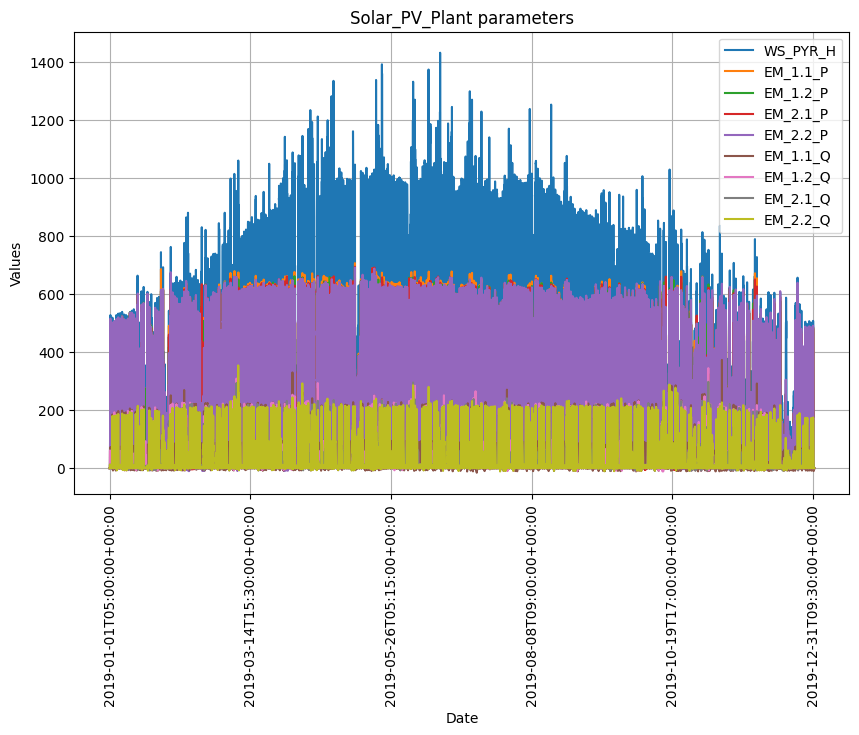

In [ ]:
# Solar_PV_Plant.set_index('Timestamp', inplace=True)
Solar_PV_Plant[['WS_PYR_H', 'EM_1.1_P', 'EM_1.2_P', 'EM_2.1_P', 'EM_2.2_P','EM_1.1_Q', 'EM_1.2_Q', 'EM_2.1_Q', 'EM_2.2_Q']].plot(title="Solar_PV_Plant parameters", figsize=(10, 6))
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.grid()
plt.show()